# Findings of Exact diagonalization

Our Hamiltonian is $H=-\sum J Z_iZ_{i+1}+\sum (h_iZ_i+g_iX_i)$

### Small entropy and infinite temperature limit
In this limit, the reduced Gibbs density matrix for single site is $\rho_G=I_2/2$. As entropy is small, the density matrix after optimization is close to an eigenstate. 

> We use superscript $i$ to denote polarization or reduced density matrix about site $i$

If we measure polarization $\vec{n}^i=\mathrm{tr}[\rho^i\vec\sigma]$, it is related to reduced density matrix by $\rho^i=(I_2+\vec{n}^i\cdot\vec{\sigma} )/2$. If we compare $\rho^i$ and $\rho_G^i$, we find polarization of is proportional to their difference:

$$|\rho^i-\rho_G^i|^2=|\vec n^i|^2/2$$

### Problem with old Parameters
In our old Hamiltonian, we are choosing $h_i=0.2$ and $g_i\sim \mathrm{Uniform}(-\Delta, \Delta)$. The problem appears for small $\Delta$, where the eigenstates are **polarized** in the $z$ direction, i.e. $\mathrm{tr}^2[\rho^i\sigma_z]\approx 1$ for any site $i$.  Consequently, the two cases below are hardly distinguishable by $|\rho-\rho_G|^2$ only: 
+ In the window $\Delta\rightarrow 0$ side, the density matrix is strongly polarized in $z$ direction, which makes it not in ETH phase at all. 
+ In the window $\Delta\rightarrow\infty$ side, it is supposed to be in MBL phase, and the density matrix is strongly polarized in $x$ (random field) direction. 

In the triangular plots we made, the diagonal of left most column shows more purplish for $\Delta\approx0$ than $\Delta\approx \infty$.
This unexpected behaviour for small $\Delta$ comes from mean value $\bar g\approx 0$. If we use nonzero $\bar g$ to break the $z$ polarization, this issue is solved.

### Todo
We need to recollect some data for the new $\bar g\neq 0$ Hamiltonian for further analysis.

### Sample plots
In the following plots, we are scatter plotting average polarization $\sum|n^i|^2/L$ vs $E$ for eigenstates.

In [63]:
from DMRG.Ising import Hamilton_TL
from DMRG.spin import sigma
import analyse as al

In [64]:
def polarization(psi, L):
    l = np.empty([L, 3])
    for i in range(L):
        psi = psi.reshape((2**i, 2, 2**(L-i-1)))
        for k in range(3):
            rho = np.einsum("ijk, imk->jm", psi, psi.conj())
            l[i, k] = np.sum(rho.T*sigma[k+1]).real
    return l
def plot_polarization(L, markersize=4, H=None):
    if H is None:
        H = Hamilton_TL(L)['H']
    w, v = eigh(H)
    P = np.empty([2**L, L, 3])
    for i in range(2**L):
        P[i] = polarization(v[:, i], L)
    P2 = np.sum(P**2, axis=(1, 2))/L

    plot(w, P2, '.', markersize=markersize);
    grid();
    ylim(0, 1.05)
    xlabel(r'$E$')
    ylabel(r'$\sum|n^i|^2/L$')
    title(r'Average polarization of $L={}$ chain'.format(L))
    savefig('polar-L={}.pdf'.format(L))

### Magic parameters that satisfy ETH: $h=0.809, g=0.945$
The polarization is very small especially for low energy.

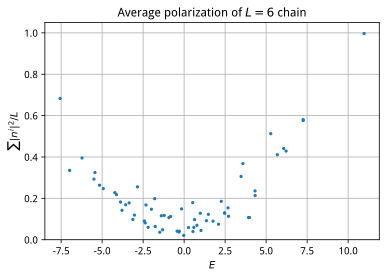

In [65]:
plot_polarization(6, markersize=4.5)

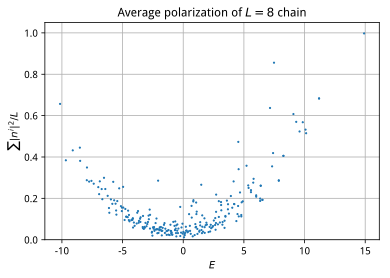

In [66]:
plot_polarization(8, markersize=2.5)

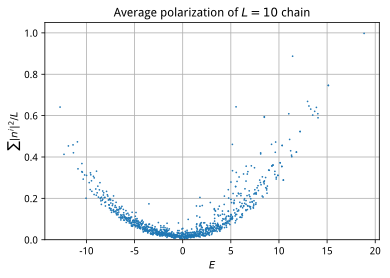

In [67]:
plot_polarization(10, markersize=1.5)

### Old parameters with $\bar g=0$, different $\Delta$, $L=9$

Arguments are put in a dict, and distribution of $g$ is specified by $g=(\mu, \Delta)$, where $\mu$ is mean value and $\Delta$ is half width of window size.

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


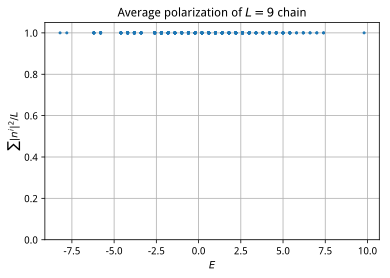

In [68]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 0)}))['H']
plot_polarization(9, H=H)

[ 9.23943636e-05 -5.11759457e-06  8.76928861e-05 -9.11255917e-05
  2.36789446e-05 -8.03999991e-05 -8.93419843e-06 -2.21085676e-05
  3.86347801e-05]


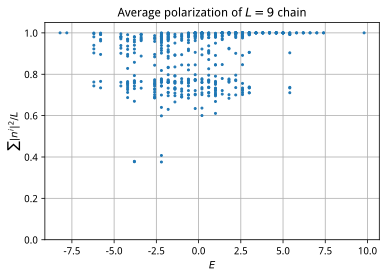

In [69]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 0.0001)}))['H']
plot_polarization(9, H=H)

[-0.57471582 -0.27845593  0.22246732  0.0302879   0.47346972 -0.85880333
 -0.76323714  0.94120527  0.93667794]


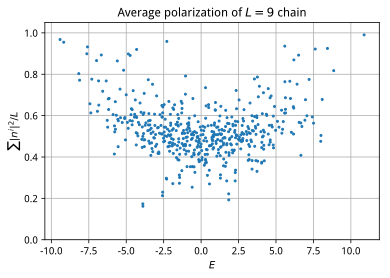

In [70]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 1)}))['H']
plot_polarization(9, H=H)

[-0.85538855  0.03445859  0.27737611  1.94867258 -0.67291193  0.62918789
 -0.55250071 -0.28841096  1.06842425]


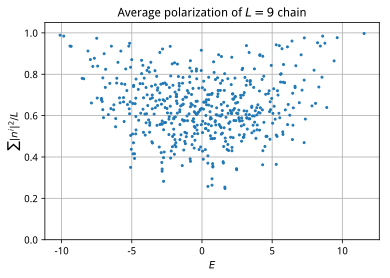

In [37]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 2)}))['H']
ETH_polarization(9, H=H)

[-0.47641314 -0.66210458  2.71030012 -1.70039893 -2.78848956  0.84145019
  2.28103223  2.71994298  2.21195958]


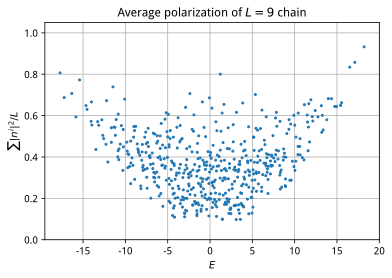

In [71]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 4)}))['H']
plot_polarization(9, H=H)

[-5.54733572 -1.1290882  -1.29303807  6.25005551  2.1968659   6.40053927
  3.46514151 -3.87073378  4.63691169]


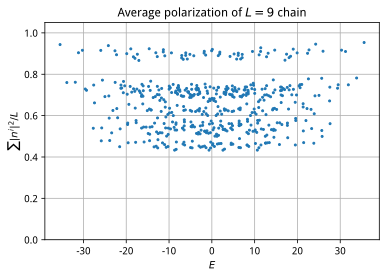

In [72]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 8)}))['H']
plot_polarization(9, H=H)

[  0.83740652 -10.65484641  -8.41112391  -2.96978769   0.80638704
   5.2033609    3.81736317  -1.16989596   8.36873547]


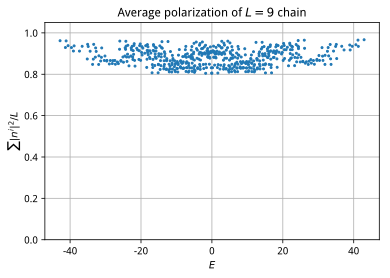

In [73]:
H = Hamilton_TL(**al.generate_args({"n":9, "J": 1, "h":0.2, "g": (0, 16)}))['H']
plot_polarization(9, H=H)

### New parameters with $\bar g\neq 1$

We are using $\bar g=0.9$ in following figures and change $\Delta$

[0.89962343 0.9006978  0.89976269 0.90046632 0.89912583 0.89945819
 0.90008873 0.89976362]


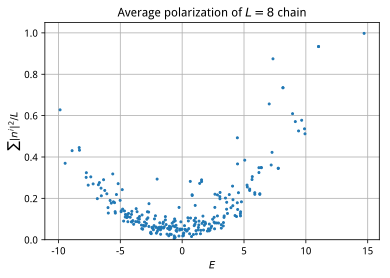

In [74]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 0.001)}))['H']
plot_polarization(8, H=H)

[0.92842447 0.81287286 0.87002018 0.81697439 0.92642926 0.8870245
 0.86864903 0.97004641]


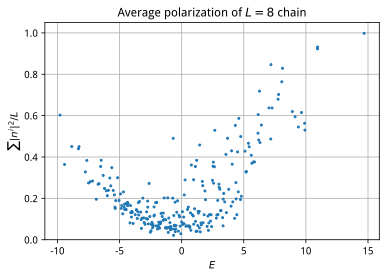

In [75]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 0.1)}))['H']
plot_polarization(8, H=H)

[0.93463066 1.03070735 1.00380134 0.71972462 0.77847954 0.99340673
 0.88296805 1.08157421]


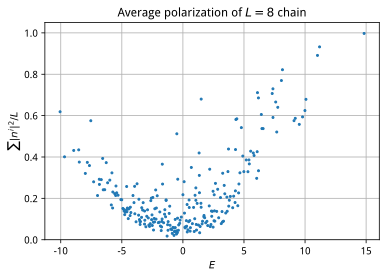

In [76]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 0.2)}))['H']
plot_polarization(8, H=H)

[1.24685329 0.9616133  0.40392418 0.96089533 0.63019759 0.74579364
 1.0173912  0.98942766]


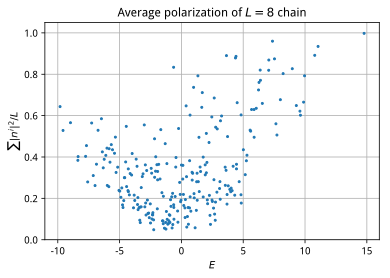

In [77]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 0.5)}))['H']
plot_polarization(8, H=H)

[1.70258429 0.47369303 0.7753255  0.89520267 1.00863128 0.6558211
 1.29404664 1.22082244]


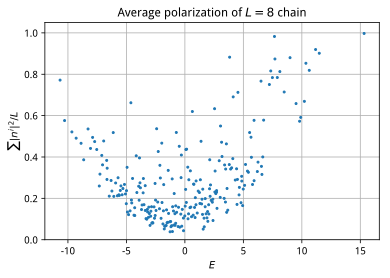

In [78]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 1)}))['H']
plot_polarization(8, H=H)

[ 0.51591976 -0.49634947  0.32105437 -0.71792135 -0.22038312 -0.85921841
 -0.01327038  2.73950925]


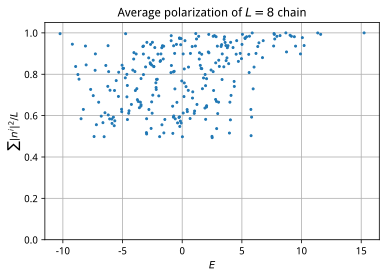

In [79]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 2)}))['H']
plot_polarization(8, H=H)

[-0.58704072  4.42442842  3.19890824  4.21913896 -2.05939546  4.73178263
  1.93097478 -2.42073089]


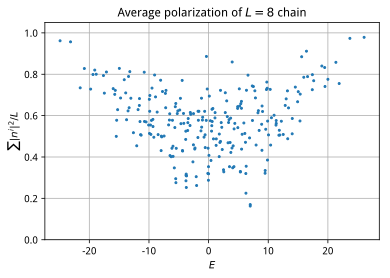

In [80]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 4)}))['H']
plot_polarization(8, H=H)

[-5.73988132  8.76873136  5.38775744 -1.22343997  0.44424992 -3.25936374
  4.72093313 -3.80987338]


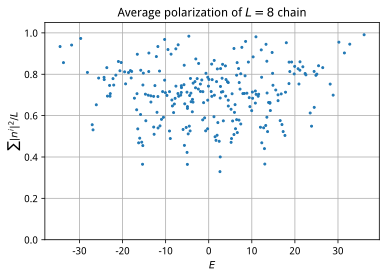

In [81]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 8)}))['H']
plot_polarization(8, H=H)

[  8.41470543  -6.49367586 -14.57885582 -11.29646486  -1.26319656
  13.03369015   3.43217412  -5.21050245]


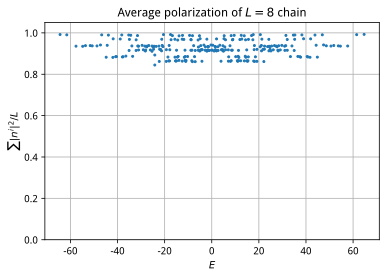

In [82]:
H = Hamilton_TL(**al.generate_args({"n":8, "J": 1, "h":0.8, "g": (0.9, 16)}))['H']
plot_polarization(8, H=H)